In [234]:
import numpy as np
import matplotlib.pyplot as plt

In [235]:
%matplotlib inline

# Problem Set 7

### PHYS 441

***

Adam A Miller  
16 November 2022  
version 0.1

Problem sets for Phys 441 are due 1 week after they are assigned at 11:59 pm. 

Every student is responsible for submitting their own *individual* solutions. Solutions must be either an executable jupyter notebook or Adobe PDF file submitted via Canvas. You must **show all your work**. Submissions that only include answers will have points deducted.

If the problem set calls for an integral, please calculate the integral by hand (in general any problem with integrals will not require the use of mathematica or similar tools).

If you wish to "write mathematics" in a Jupyter notebook, this can be done using LaTeX formatting.

LaTeX is great at typesetting mathematics. Let $X_1, X_2, \ldots, X_n$ be a sequence of independent and identically distributed random variables with $\text{E}[X_i] = \mu$ and $\text{Var}[X_i] = \sigma^2 < \infty$, and let

$$S_n = \frac{X_1 + X_2 + \cdots + X_n}{n}
      = \frac{1}{n}\sum_{i}^{n} X_i\$$
      
denote their mean. Then as $n$ approaches infinity, the random variables $\sqrt{n}(S_n - \mu)$ converge in distribution to a normal $\mathcal{N}(0, \sigma^2)$.

You can find a [summary of all the LaTeX math symbols](https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols) from Overleaf. 

## New note

**If you submit a jupyter notebook as a pdf MAKE SURE the pdf shows all the text/code within the cells. Lines of code that are very long do not automatically "wrap" when exporting to pdf**

## Problem 1)

In class we built a function to run the Metropolis Hastings algorithm in order to perform MCMC integration. We will expand on that example here. 

**Problem 1a**

Write a function `lnlikelihood` to calculate the log likelihood for observations $y = mx + b$, with uncertainties on the $y_i$. The inputs to this function should be the model parameters `theta`, as well as the observational data `y`, `y_unc`, and `x`.

Write a function `lnprior` to calculate the log of the prior, for a **Gaussian** prior on $m$ and $b$. Use $P(m) = \mathcal{N}(2,1^2)$ and $P(b) = \mathcal{N}(10,5^2)$.

Write a function `lnposterior` that calculates the log of the unnormalized posterior (i.e., you can ignore the evidence $P(D)$).

*Hint* – these functions will be very similar to those from class.

In [236]:
def lnlikelihood(theta, x, y, y_unc):
    m, b = theta    
    logl = -0.5 * np.sum((y - (m*x + b))**2/(y_unc**2)) # complete
    
    return logl

def lnprior(theta):
    m, b = theta
    logpr_m = -0.5 * np.log(2 * np.pi) - np.log(1) - np.power(m-2, 2)/(2*(1**2))
    logpr_b = -0.5 * np.log(2 * np.pi) - np.log(5) - np.power(b-10, 2)/(2*(5**2))
    logpr = logpr_m + logpr_b
    return logpr

def lnposterior(logprior, loglikelihood):
    logpost = logprior + loglikelihood
    return logpost

**Problem 1b**

Make a scatter plot of the following observations and show the uncertainties on y. 

y = [ 18.29736291, 34.27306694, 36.28221691, -12.50674116, 28.51698955,  6.76299299, 21.95796824,  5.10013127, 22.34652411, 26.24095257, -7.65134878,  6.85798303, 30.84023215, 26.86927236, 13.02012232, 36.19040675, 47.51320751, 27.11466315, 43.12450007, 31.19767253,  5.02105035, 14.74843143, 12.44910031, 14.46034553, 21.54930757]  
y_unc = [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]  
x = [18.46178619, 13.42550614, 19.38315408, 0.51402241, 20.13427388, 3.56157375, 8.44116633, 4.32288449, 10.59034577, 21.54963424, 0.09954113, 2.41771422, 11.84335386, 16.39501881, 13.68538744, 15.49224754, 17.42669444, 10.10883627, 15.5082423, 12.97417389, 10.29889807, 8.56701695, 13.70297965, 6.53515459, 15.36354875]

*Hint* – you can execute the cell below to load the data.

In [237]:
y = np.array([ 18.29736291, 34.27306694, 36.28221691, -12.50674116, 28.51698955,  6.76299299, 21.95796824,  5.10013127, 22.34652411, 26.24095257, -7.65134878,  6.85798303, 30.84023215, 26.86927236, 13.02012232, 36.19040675, 47.51320751, 27.11466315, 43.12450007, 31.19767253,  5.02105035, 14.74843143, 12.44910031, 14.46034553, 21.54930757])
y_unc = np.array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])
x = np.array([18.46178619, 13.42550614, 19.38315408, 0.51402241, 20.13427388, 3.56157375, 8.44116633, 4.32288449, 10.59034577, 21.54963424, 0.09954113, 2.41771422, 11.84335386, 16.39501881, 13.68538744, 15.49224754, 17.42669444, 10.10883627, 15.5082423, 12.97417389, 10.29889807, 8.56701695, 13.70297965, 6.53515459, 15.36354875])

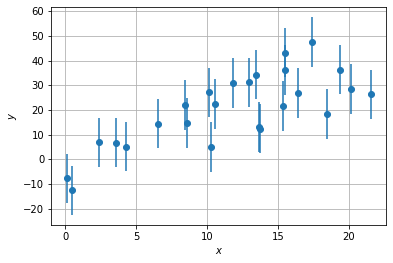

In [238]:
fig, ax = plt.subplots()

ax.errorbar(x, y, yerr=y_unc, linestyle='None', fmt='o');
ax.set_xlabel(r'$x$');
ax.set_ylabel(r'$y$');
plt.grid();

**Problem 1c**

Write a function to run the MH algorithm and return the MCMC chain, the log of the posterior at every value within the chain, and the acceptance ratio for each step in the chain.

In [239]:
def mcmc(theta_0, cov, nsteps, x, y, y_unc):
    
    positions = np.zeros((nsteps+1, len(theta_0)))
    logpost_at_pos = -np.inf*np.ones(nsteps+1) # set posterior to be 0 at chain values by default
    acceptance_ratio = np.zeros_like(logpost_at_pos)
    accepted_counts = 0
    
    positions[0] = theta_0
    logpost_at_pos[0] = lnposterior(lnprior(theta_0), lnlikelihood(theta_0, x, y, y_unc))
    
    for step in range(nsteps):
        if np.shape(positions[step]) == np.shape(cov):
            cov = np.diag(np.array(cov)**2)
    
        theta_propose = np.random.multivariate_normal(positions[step], cov)

        logpost1 = lnposterior(lnprior(theta_propose), lnlikelihood(theta_propose, x, y, y_unc))
        logpost0 = lnposterior(lnprior(positions[step]), lnlikelihood(positions[step], x, y, y_unc))
        
        hastings = np.exp(logpost1 - logpost0)
        
        p_rand = np.random.rand()
        if hastings >= p_rand:
            positions[step + 1] = theta_propose
            logpost_at_pos[step + 1] = logpost1
            accepted_counts += 1
            acceptance_ratio[step+1] = accepted_counts/(step+1)
        else:
            positions[step + 1] = positions[step]
            logpost_at_pos[step + 1] = logpost_at_pos[step]
            acceptance_ratio[step+1] = accepted_counts/(step+1)
    
    
    return (positions, logpost_at_pos, acceptance_ratio)

**Problem 1d**

Using the above function, calculate an MCMC chain for 2000 steps. Use a covariance for the multivariate jump proposal `cov = [0.1, 2]`. 

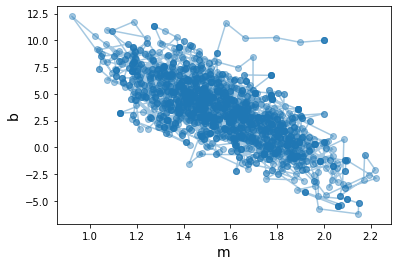

In [240]:
positions, logpost, acc_ratio = mcmc((2,10), (0.1, 2), 2000, x, y, y_unc)
plt.plot(positions[:,0], positions[:,1], 'o-', alpha=0.4);
plt.xlabel('m', fontsize=14);
plt.ylabel('b', fontsize=14);

**Problem 1e**

Plot the marginal distribution for the slope of the line $m$. Overplot the prior, as a solid line, on the same figure. 

What is the 68% credible region for $m$?

*Hint* – the marginal distribution can be shown as a histogram.

*Second hint* – did you account for burn-in?

The 68% credible region is: [1.3340, 1.8018]


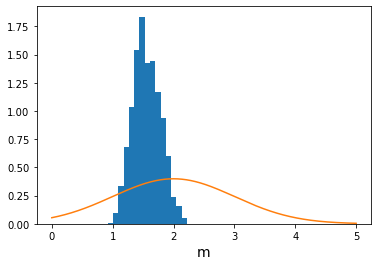

In [241]:
plt.hist(positions[50:,0], bins=15, density=True);
plt.xlabel('m', fontsize=14);

# plt.plot(np.arange(0,len(acc_ratio)), acc_ratio);

m_range = np.linspace(0,5, num=10000)
m_prior = np.power(2*np.pi*(1**2),-1/2)*np.exp(-1*np.power(m_range-2,2)/(2*(1**2)))
plt.plot(m_range, m_prior);

m_lower = np.percentile(positions[50:,0], 16)
m_upper = np.percentile(positions[50:,0], 84)

print("The 68% credible region is: [{0:.4f}, {1:.4f}]".format(m_lower, m_upper)) # complete

*To account for burn-in, I omitted the first 50 data points.*

**Problem 1f**

How does the maximum-likelihood estimate for $m$ compare?

*Hint* – you can use any of the many different methods we have discussed to determine the MLE slope. 

The best-fit value for the slope and intercept are: m=1.8527 and b=-0.2536


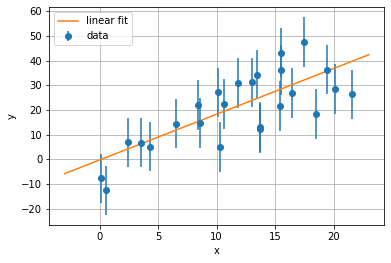

In [242]:
num_pts = len(x)
A = np.full((num_pts,2),1)
for i in range(num_pts):
    A[i][1] = x[i]

V = np.diag(np.power(y_unc, 2))

AT_Vinv_A = np.matmul(np.transpose(A), np.matmul(np.linalg.inv(V), A))
AT_Vinv_Y = np.matmul(np.transpose(A), np.matmul(np.linalg.inv(V), y))
parameters = np.matmul(np.linalg.inv(AT_Vinv_A), AT_Vinv_Y)

xrange = np.linspace(-3, 23, num=10000)
yfit = parameters[1]*xrange+parameters[0]

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=y_unc, linestyle='', fmt='o', label='data');
ax.plot(xrange, yfit, label='linear fit');
ax.legend();
plt.xlabel('x');
plt.ylabel('y');
plt.grid();

print("The best-fit value for the slope and intercept are: m={0:.4f} and b={1:.4f}".format(parameters[1], parameters[0]))

The fit value of m=1.8527 lines up fairly well with the peak of the marginal in part e. **

**Problem 1g**

Modify your M-H algorithm to use a different prior, specifically $P(m) = \mathcal{N}(2.5,0.1^2)$ and $P(b) = \mathcal{N}(0,3^2)$.

*Hint* – you only need to update `lnprior` everything else sould work just fine.

In [243]:
def lnprior(theta):
    m, b = theta
    logpr_m = -0.5*np.log(2*np.pi)-np.log(0.1)-np.power(m-2.5,2)/(2*(0.1**2))
    logpr_b = -0.5*np.log(2*np.pi)-np.log(3)-np.power(b,2)/(2*(3**2))
    logpr = logpr_m + logpr_b
    return logpr

**Problem 1h**

Using the above function, calculate an MCMC chain for 5000 steps. Use a covariance for the multivariate jump proposal `cov = [0.075, 1.5]`. 

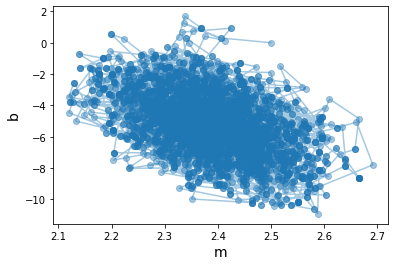

In [244]:
positions, logpost, acc_ratio = mcmc((2.5,0), (0.075, 1.5), 5000, x, y, y_unc)
plt.plot(positions[:,0], positions[:,1], 'o-', alpha=0.4);
plt.xlabel('m', fontsize=14);
plt.ylabel('b', fontsize=14);

**Problem 1i**

Plot the marginal distribution for the slope of the line $m$. Overplot the prior, as a solid line, on the same figure. 

What is the 68% credible region for $m$?

The 68% credible region is: [2.2945, 2.4769]


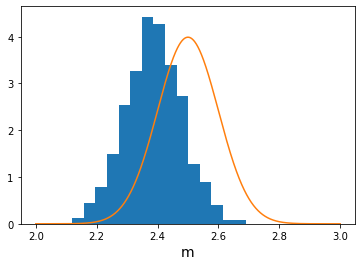

In [245]:
plt.hist(positions[50:,0], bins=15, density=True);
plt.xlabel('m', fontsize=14);

m_range = np.linspace(2,3, num=10000)
m_prior = np.power(2*np.pi*(0.1**2),-1/2)*np.exp(-1*np.power(m_range-2.5,2)/(2*(0.1**2)))
plt.plot(m_range, m_prior);

m_lower = np.percentile(positions[50:,0], 16)
m_upper = np.percentile(positions[50:,0], 84)

print("The 68% credible region is: [{0:.4f}, {1:.4f}]".format(m_lower, m_upper))

**Problem 1j**

Select 7 random samples from your chain. Each of these constitutes a posterior predictive sample. Overplot the lines defined by these samples on top of the data. 

What can you say about the prior adopted in **1g**?

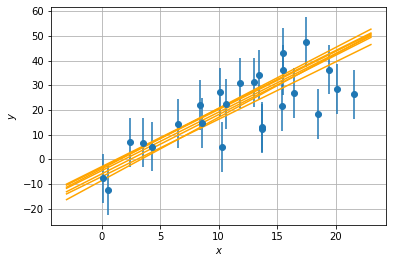

In [246]:
import random

fig, ax = plt.subplots()

samps = np.array([random.choice(positions) for x in range(7)])

ax.errorbar(x, y, yerr=y_unc, linestyle='None', fmt='o');
ax.set_xlabel(r'$x$');
ax.set_ylabel(r'$y$');
plt.grid();

for i in range(7):
    ax.plot(xrange, samps[i][0]*xrange + samps[i][1], color='orange');

*write your answer here*


## Problem 2)

In this problem we will conduct a simple experiment and use the results to update priors.  

**Problem 2a** 

You are given a bag that has 4 bills of US currency in it. The bills are either $\$1$ or $\$100$, but you have no information about how many are $\$1$ and how many are $\$100$. 

Using the principle of indifference, write down a prior for the number of $\$100$ bills in the bag. Plot the prior.

*Hint* – the prior is discrete, but like all p.d.f.s must sum to 1.

We assume that by indifference, each bill has probability 1/2 of being either $\$1$ or $\$100$. A prior for the number of $\$100$ bills - for 4 total bills - is thus binomially distributed:<br>
$p(N_{\$100})=\frac{4!}{N_{\$100}!(4-N_{\$100})!}(1/2)^{N_{\$100}}(1/2)^{4-N_{\$100}}=\frac{4!}{N_{\$100}!(4-N_{\$100})!}\frac{1}{2^4}=\frac{3}{2}\frac{1}{N_{\$100}!(4-N_{\$100})!}$

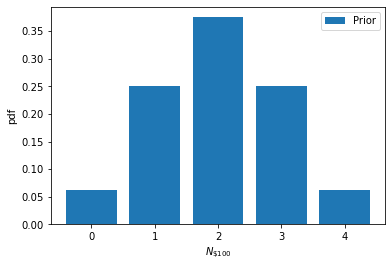

In [247]:
from scipy.special import factorial

possible_N100 = np.arange(0, 5)
prior = 1.5 * np.power(np.multiply(factorial(possible_N100), factorial(np.full(len(possible_N100), 4) - possible_N100)), -1)

plt.bar(possible_N100, prior, label='Prior');
plt.legend();
plt.xlabel(r'$N_{\$100}$');
plt.ylabel(r'pdf');

**Problem 2b**

You are allowed to select a single bill from the bag, and it is a $\$100$. 

Calculate the likelihood for each possible configuration of bills given "the data" (i.e., that one drawn bill was $\$100$). 

Plot the likelihood $p(\textrm{draw a } \$100 \textrm{ bill} | N_{\$100})$.

If the first bill is $\$100$, there are 3! possible configurations for the other three bills, which will also be binomially distributed. Let's define $N$ as the number of $\$100$ bills after drawing the first one, so that $N_{\$100}=1+N\implies N=N_{\$100}-1$. The distribution for the likelihood is then<br>
$p(\textrm{draw a } \$100 \textrm{ bill} | N_{\$100})=\frac{3!}{N!(3-N)!}(1/2)^N(1/2)^{3-N}=\frac{3!}{(N_{\$100}-1)!(3-(N_{\$100}-1))!}(1/2)^{N_{\$100}-1}(1/2)^{3-(N_{\$100}-1)}=\frac{3!}{(N_{\$100}-1)!(4-N_{\$100})!}(1/2)^{N_{\$100}-1}(1/2)^{4-N_{\$100}}$<br>
$\implies p(\textrm{draw a } \$100 \textrm{ bill} | N_{\$100})=\frac{3}{4}\frac{1}{(N_{\$100}-1)!(4-N_{\$100})!}$<br><br>
(Note also that the information that one draw was $\$100$ restricts the possible values of $N_{\$100}$ to between 1 and 4)

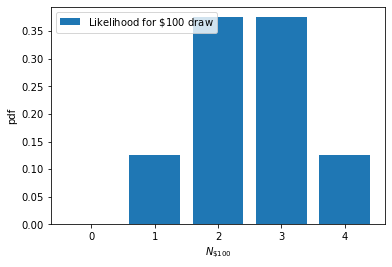

In [248]:
possible_N = np.arange(1, 5)
likelihood = np.zeros(1)
likelihood = np.append(likelihood, 0.75 * np.power(np.multiply(factorial(possible_N-np.full(len(possible_N), 1)), factorial(np.full(len(possible_N), 4) - possible_N)), -1))

plt.bar(possible_N100, likelihood, label=r'Likelihood for $\$ 100$ draw');
plt.legend();
plt.xlabel(r'$N_{\$100}$');
plt.ylabel(r'pdf');

**Problem 2c**

Using your likelihood and prior, calculate the posterior for the number of $\$100$ bills in the bag. 

*Hint* – the posterior is a p.d.f.

$\textrm{posterior}=\frac{\textrm{likelihood}*\textrm{prior}}{\textrm{p(data)}}$<br><br>
One can find $\textrm{p(data)}$ by enforcing $\sum_{i=0}^4 \textrm{posterior}=\frac{1}{\textrm{p(data)}}\sum_{i=0}^4 \textrm{likelihood}*\textrm{prior}=1\implies \textrm{p(data)}=\sum_{i=0}^4 \textrm{likelihood}*\textrm{prior}$

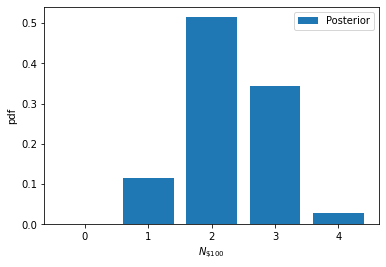

In [249]:
posterior = np.multiply(likelihood, prior)
pdata = np.sum(posterior)
posterior /= pdata

plt.bar(possible_N100, posterior, label='Posterior');
plt.legend();
plt.xlabel(r'$N_{\$100}$');
plt.ylabel(r'pdf');

**Problem 2d**

The $\$100$ bill is placed back in the bag. You select another bill from the bag, it is a $\$1$ bill. 

Plot the likelihood, $p(\textrm{draw a } \$1 \textrm{ bill} | N_{\$100})$, for drawing a $\$1$ bill from the bag.

We now know that there is at least one $\$1$ bill and at least one $\$100$ bill in the bag. That means that $N_{\$100}$ can now only take values from 1 to 3.

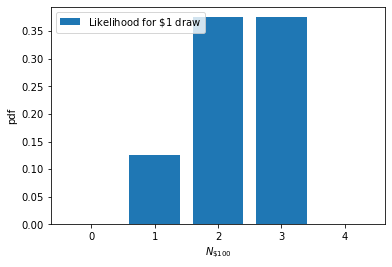

In [250]:
possible_N = np.arange(1, 4)
new_likelihood = np.zeros(1)
new_likelihood = np.append(new_likelihood, 0.75 * np.power(np.multiply(factorial(possible_N-np.full(len(possible_N), 1)), factorial(np.full(len(possible_N), 4) - possible_N)), -1))
new_likelihood = np.append(new_likelihood, 0)

plt.bar(possible_N100, new_likelihood, label=r'Likelihood for $\$ 1$ draw');
plt.legend();
plt.xlabel(r'$N_{\$100}$');
plt.ylabel(r'pdf');

**Problem 2e**

Calculate the posterior for the number of $\$100$ bills in the bag. Use the results from the first experiment as your prior for the second experiment.

Do your results make sense?

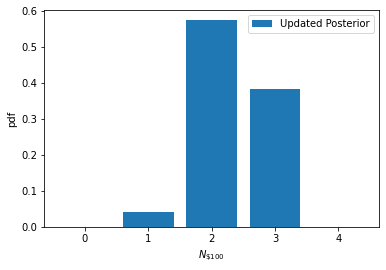

In [251]:
new_posterior = np.multiply(new_likelihood, posterior)
pdata = np.sum(new_posterior)
new_posterior /= pdata

plt.bar(possible_N100, new_posterior, label='Updated Posterior');
plt.legend();
plt.xlabel(r'$N_{\$100}$');
plt.ylabel(r'pdf');

Like I mentioned earlier, given that there is at least one $\$1$ bill and at least one $\$100$ bill in the bag, we know that $N_{\$100}$ can only take values from 1 to 3.<br><br>
As for the distribution shape, the posterior of the first experiment heavily weights the probability of getting 2 or 3 $\$100$ bills. This makes sense to me because in that case you essentially are picking 1 or 2 $\$100$ bills from the remaining three bills, which intuitively seems more likely than picking 2 or 3 bills from 4 slots.

## Problem 3)

Unreliable experimentalists. 

You (foolishly!) decide to befriend an experimentalist. The experimentalist has collected some observations of a random variable that has a linear relationship to a dependent variable (i.e., $y = mx + b$). 

**Problem 3a**

The experimentalist gives you the observations: 

y = [-323.06784362, 951.5329835, 1624.60411937, 523.71102977, 1686.81461432, 1145.33647822, 407.52259706, 89.49034911, 422.37688187, 1780.61985005, 2202.77330898, 593.47430676, 1207.13832901, 82.44438696, 852.46085987, 1725.32546389, 2118.72500295, 1714.81144005]  
y_unc = [145.04890632, 156.95558291, 101.25609822, 70.28530931, 160.83777037, 121.67910032, 85.69670104, 59.59170488, 97.94085661, 64.82428022, 66.79395355, 83.56478711, 79.71422451, 97.82879082, 67.80030955, 117.7953663, 68.01463333, 97.25222409]
x = [24.99003241, 9.39199623, 61.78810068, 6.12686943, 66.76437623, 76.27093556, 11.197759, 4.34864028, 41.85616486, 99.85155482, 97.88906765, 25.95412469, 56.43497299, 24.4771456, 32.52404943, 90.02733475, 95.55748004, 72.97647065]


Make a scatter plot of the data. What are your first impressions of the observations?

*Hint* – you can execute the cell below to load the data.

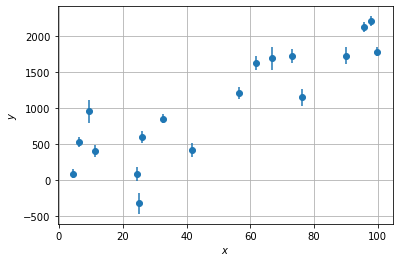

In [252]:
y = np.array([-323.06784362, 951.5329835, 1624.60411937, 523.71102977, 1686.81461432, 1145.33647822, 407.52259706, 89.49034911, 422.37688187, 1780.61985005, 2202.77330898, 593.47430676, 1207.13832901, 82.44438696, 852.46085987, 1725.32546389, 2118.72500295, 1714.81144005])
y_unc = np.array([145.04890632, 156.95558291, 101.25609822, 70.28530931, 160.83777037, 121.67910032, 85.69670104, 59.59170488, 97.94085661, 64.82428022, 66.79395355, 83.56478711, 79.71422451, 97.82879082, 67.80030955, 117.7953663, 68.01463333, 97.25222409])
x = np.array([24.99003241, 9.39199623, 61.78810068, 6.12686943, 66.76437623, 76.27093556, 11.197759, 4.34864028, 41.85616486, 99.85155482, 97.88906765, 25.95412469, 56.43497299, 24.4771456, 32.52404943, 90.02733475, 95.55748004, 72.97647065])


fig, ax = plt.subplots()

ax.errorbar(x, y, yerr=y_unc, linestyle='None', fmt='o');
ax.set_xlabel(r'$x$');
ax.set_ylabel(r'$y$');
plt.grid();

At first glance, the data seems to follow a linear trend with positive slope, so I would suspect a linear fit to the data.<br><br>
I notice, however, that the error bars of the individual points are seemingly small compared to the vertical spacing between the points, suggesting that the $\chi^2$ for such a linear fit might be a bit poor.

**Problem 3b**

Calculate the MLE for the slope and intercept of the line relating $y$ and $x$. 

The best-fit value for the slope and intercept are: m=19.4924 and b=107.2675


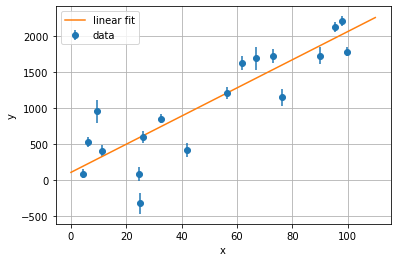

In [253]:
num_pts = len(x)
A = np.full((num_pts,2),1)
for i in range(num_pts):
    A[i][1] = x[i]

V = np.diag(np.power(y_unc, 2))

AT_Vinv_A = np.matmul(np.transpose(A), np.matmul(np.linalg.inv(V), A))
AT_Vinv_Y = np.matmul(np.transpose(A), np.matmul(np.linalg.inv(V), y))
parameters = np.matmul(np.linalg.inv(AT_Vinv_A), AT_Vinv_Y)

xrange = np.linspace(0, 110, num=10000)
yfit = parameters[1]*xrange+parameters[0]

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=y_unc, linestyle='', fmt='o', label='data');
ax.plot(xrange, yfit, label='linear fit');
ax.legend();
plt.xlabel('x');
plt.ylabel('y');
plt.grid();

print("The best-fit value for the slope and intercept are: m={:.4f} and b={:.4f}".format(parameters[1], parameters[0]))

**Problem 3c**

You suspect that your experimentalist friend has made a mistake. However, when you ask them if there may be any issues with the data the experimentalist becomes extremely defensive and decides to no longer talk to you. 

You are left to proceed with your analysis with no additional information about the experiment. 

A general way to adjust the model is to "inflate" the uncertainties by a constant scaling factor, $A$. In doing so, the normal Gaussian p.d.f. becomes: 

$$p(\{y_i\}|\{x_i\}, \{\sigma_{y_i}\}, m, b, A) = \frac{1}{\sqrt{2\pi A^2 \sigma_{y_i}^2}} \exp\left(-\frac{(y_i - mx_i - b)^2}{2A^2\sigma_{y_i}^2}\right)$$


Write functions to calculate the likelihood, prior, and posterior for the given observations and model parameters $m, b,$ and $A$. 

*Hint* – think about the appropriate prior for A.

In [254]:
def lnlikelihood(theta, x, y, y_unc):
    m, b, A = theta    
    logl = -0.5 * np.sum((y - (m*x + b))**2/((A**2)*(y_unc**2))) # complete
    
    return logl

def lnprior(theta):
    m, b, A = theta
    if 0 <= m <= 100 and -500 <= b <= 500 and 0 <= A <= 10:
        logpr = np.log(1/100)+np.log(1/1000)+np.log(1/10)
    else:
        logpr = -np.inf
    
#     logpr_m = -0.5 * np.log(2 * np.pi) - np.log(1) - np.power(m-2, 2)/(2*(1**2)) #uniform?
#     logpr_b = -0.5 * np.log(2 * np.pi) - np.log(5) - np.power(b-10, 2)/(2*(5**2)) #uniform?
#     logpr_A = 0 #uniform?
#     logpr = logpr_m + logpr_b + logpr_A
    
    return logpr

def lnposterior(logprior, loglikelihood):
    if not np.isfinite(logprior):
        return -np.inf
    logpost = logprior + loglikelihood
    return logpost

**Problem 3d**

Run a MH MCMC for 25000 steps. Use `cov = [1,10,0.5]` for the sampler.

*Hint* – you may need to refine your initial guess a few times.

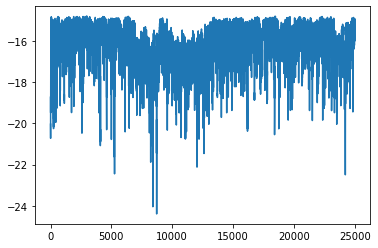

In [260]:
def mcmc_3_param(theta_0, cov, nsteps, x, y, y_unc):
    positions = np.zeros((nsteps+1, len(theta_0)))
    logpost_at_pos = -np.inf*np.ones(nsteps+1) # set posterior to be 0 at chain values by default
    acceptance_ratio = np.zeros_like(logpost_at_pos)
    accepted_counts = 0
    
    positions[0] = theta_0
    logpost_at_pos[0] = lnposterior(lnprior(theta_0), lnlikelihood(theta_0, x, y, y_unc))
    
    for step in range(nsteps):
        if np.shape(positions[step]) == np.shape(cov):
            cov = np.diag(np.array(cov)**2)
    
        theta_propose = np.random.multivariate_normal(positions[step], cov)

        logpost1 = lnposterior(lnprior(theta_propose), lnlikelihood(theta_propose, x, y, y_unc))
        logpost0 = lnposterior(lnprior(positions[step]), lnlikelihood(positions[step], x, y, y_unc))
        
        hastings = np.exp(logpost1 - logpost0)
        
        p_rand = np.random.rand()
        if hastings >= p_rand:
            positions[step + 1] = theta_propose
            logpost_at_pos[step + 1] = logpost1
            accepted_counts += 1
            acceptance_ratio[step+1] = accepted_counts/(step+1)
        else:
            positions[step + 1] = positions[step]
            logpost_at_pos[step + 1] = logpost_at_pos[step]
            acceptance_ratio[step+1] = accepted_counts/(step+1)
    
    
    return (positions, logpost_at_pos, acceptance_ratio)

positions, logpost, acc_ratio = mcmc_3_param((20, 100, 4), (1, 10, 0.5), 25000, x, y, y_unc)

# plt.plot(np.arange(0,len(acc_ratio)), acc_ratio);
# plt.plot(np.arange(0,len(logpost)), logpost);

**Problem 3e**

Plot the chains for the slope and the intercept. Do you need to throw away some burn-in samples?

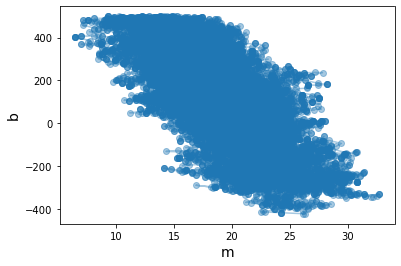

In [256]:
plt.plot(positions[100:,0], positions[100:,1], 'o-', alpha=0.4);
plt.xlabel('m', fontsize=14);
plt.ylabel('b', fontsize=14);

*write your answer here*


**Problem 3f**

Plot the marginal distribution for the slope of the line. What is the 68% credible region on the slope?

The 68% credible region is: [15.3111, 22.8384]


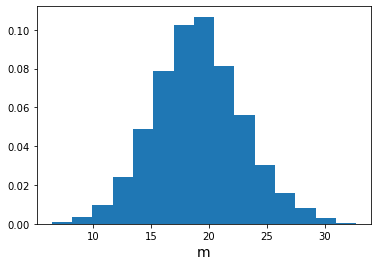

In [257]:
plt.hist(positions[100:,0], bins=15, density=True);
plt.xlabel('m', fontsize=14);

m_lower = np.percentile(positions[100:,0], 16)
m_upper = np.percentile(positions[100:,0], 84)

print("The 68% credible region is: [{0:.4f}, {1:.4f}]".format(m_lower, m_upper))


Using `np.polyfit` we can get the MLE confidence intervals on the slope.

In [258]:
p, cov = np.polyfit(x, y, 1, w=1/y_unc, cov=True)

print(f'The MLE slope is {p[0]:.2f} +/- {cov[0][0]**0.5:.2f}')

The MLE slope is 19.41 +/- 1.92


The true answer is that the slope is 23. In that sense we should prefer the Bayes estimate of the slope. 

But that's not the point! 

For real experiments we never know the "true" answer. But we may suspect that the uncertainties are incorrectly estimated. For both the frequentist case and the Bayesian case we can modify the model (and hence likelihood) to inflate the uncertainties by some factor $A$. But if we do this as a frequentist, then we are saying the uncertainties are *definitely* estimated incorrectly and by an amount $\hat{A}$. As a Bayesian, we consider all possible values of $A$, and then integrate our estimate of the posterior over all values of $A$ to arrive at an estimate for $m$ (and it's credible region) *removing any dependence on A for that answer*! 

This is the power of Bayes, and why it is really useful for complex experiments/data systems.